In [24]:
import requests
# from config_weather_api_key import api_key
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import hvplot.pandas
import scipy.stats as stats

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the clean CSV file
df = pd.read_csv("../Data/clean_UFO.csv")

#View the first 5 rows 
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True


In [3]:
df.nunique()

Date_time                      55652
city                           11235
state/province                    52
country                            1
UFO_shape                         19
length_of_encounter_seconds      460
description                    63321
latitude                       11495
longitude                      12293
year                              83
month                             12
is_weekend                         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    63553 non-null  object 
 1   city                         63553 non-null  object 
 2   state/province               63553 non-null  object 
 3   country                      63553 non-null  object 
 4   UFO_shape                    63553 non-null  object 
 5   length_of_encounter_seconds  63553 non-null  float64
 6   description                  63553 non-null  object 
 7   latitude                     63553 non-null  float64
 8   longitude                    63553 non-null  float64
 9   year                         63553 non-null  int64  
 10  month                        63553 non-null  int64  
 11  is_weekend                   63553 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 5.4+ MB


In [5]:
# sort the entire dataframe by 'year', then 'month'
df.sort_values(by=["year", "month"], inplace=True)
df.head(50)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False
21400,1931-02-15 14:00:00,holyoke (6-8 miles southwest of),co,us,oval,60.0,In the winter of 1931&#44 I saw a flying machi...,40.584444,-102.301944,1931,2,True
37345,1931-06-01 13:00:00,abilene,ks,us,disk,1800.0,This is a what my mother related to me regardi...,38.917222,-97.213611,1931,6,False
58901,1934-09-15 15:30:00,valley city (6.5 miles east of),nd,us,disk,5.0,Two brothers observe&#44 hear&#44 three black ...,46.923333,-98.002778,1934,9,True
1380,1936-10-15 17:00:00,eklutna,ak,us,cigar,180.0,Two men approached by a cigar-shaped object in...,61.458056,-149.362222,1936,10,False
38619,1937-06-15 00:00:00,hubbard,or,us,cylinder,10.0,It had a bluish tint with what looked like a c...,45.182500,-122.806667,1937,6,False


In [6]:
# look at a list of all the years present in our dataset
year_list = sorted(df['year'].unique().tolist())
print(year_list)

[1910, 1920, 1925, 1929, 1931, 1934, 1936, 1937, 1939, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


In [7]:
# Create the bins for sightings by decades
bins = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create the names for the five bins
group_labels = ["pre_1960s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

# Slice the data and place it into bins
pd.cut(df["year"], bins, labels=group_labels).value_counts()
# it's interesting that the decades don't see a steady increase over time

2000s        30158
2010s        22014
1990s         6500
1970s         1823
1980s         1588
1960s         1045
pre_1960s      425
Name: year, dtype: int64

In [8]:
# Place the decade data into a new column inside of the DataFrame
df["decades"] = pd.cut(df["year"], bins, labels=group_labels)
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s


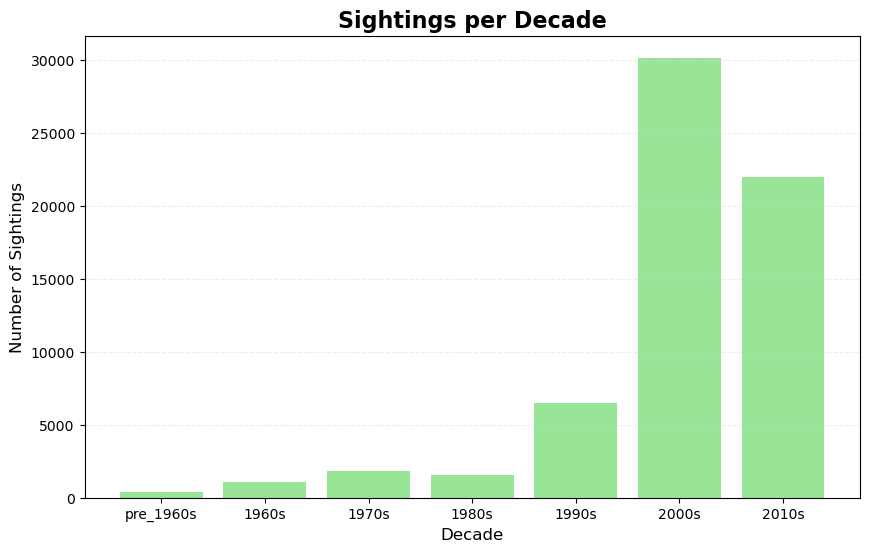

In [9]:
# Bar chart for number of sightings per decade
# create a new dataframe for the desired data
decades_count_df = df.groupby("decades")["year"].count().reset_index()

# init the plot
plt.figure(figsize=(10,6))
plt.bar(decades_count_df.decades, decades_count_df.year, color="limegreen", alpha=0.5, align="center")

# customize the plot
plt.title("Sightings per Decade", fontsize=16, fontweight="bold")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)

plt.grid(axis="y", c="lightgray", linestyle="dashed", alpha=0.4)

# save the bar chart
plt.savefig("sightings_per_decade_bar.png")

# show the plot
plt.show()

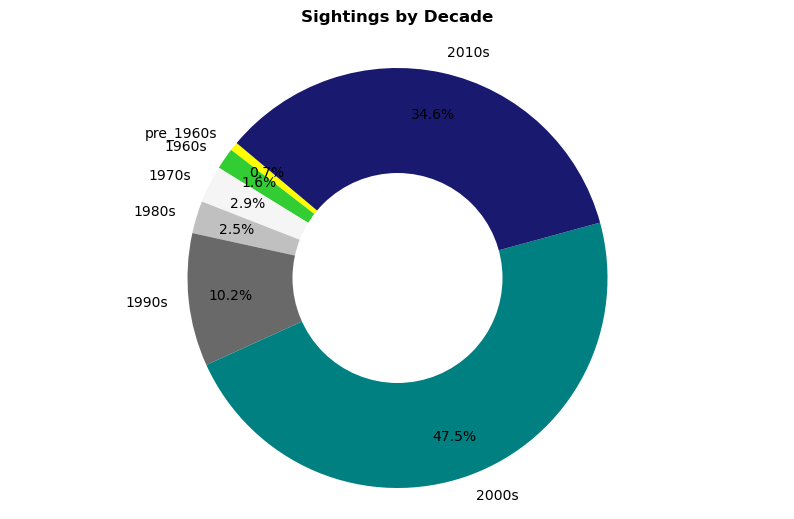

In [10]:
# Donut chart to look at sightings per decade in a proportionate way
# configure the chart
plt.figure(figsize=(10,6))
plt.pie(decades_count_df.year,
        labels=decades_count_df.decades,
        autopct="%1.1f%%",
        colors=["yellow", "limegreen","whitesmoke","silver","dimgrey","teal","midnightblue"],
        pctdistance=0.80,
        startangle=140)

# draw the chart
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Sightings by Decade\n", fontweight="bold")
plt.axis("equal")

# save the donut chart
plt.savefig("sightings_per_decade_donut.png")

# show the donut chart
plt.show()

In [11]:
# define US region groupings, and make a new column for "region"
southwest = ['az','tx','nm','ok']
southeast = ['al','ar','la','ms','tn','ky','wv','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','md','ri','ct','nj','de','pa','ny']
middle_west = ['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh']
west = ['wa', 'mt', 'or', 'id', 'wy', 'co', 'nm', 'ca', 'az', 'nv', 'ut', 'ak', 'hi']
df["region"] = None

df.loc[df["state/province"].isin(southwest), "region"] = "Southwest"
df.loc[df["state/province"].isin(southeast), "region"] = "Southeast"
df.loc[df["state/province"].isin(northeast), "region"] = "Northeast"
df.loc[df["state/province"].isin(middle_west), "region"] = "Middle West"
df.loc[df["state/province"].isin(west), "region"] = "West"
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s,West


In [12]:
# look at number of sightings per region
df.region.value_counts()

West           21591
Southeast      13439
Middle West    13320
Northeast      11060
Southwest       4112
Name: region, dtype: int64

In [13]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,decades,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,pre_1960s,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,pre_1960s,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,pre_1960s,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,pre_1960s,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,pre_1960s,West


In [14]:
# create a new dataframe to look at sightings per region over time (by decade)
decade_region_df = df.groupby(["decades", "region"])["year"].count().reset_index()

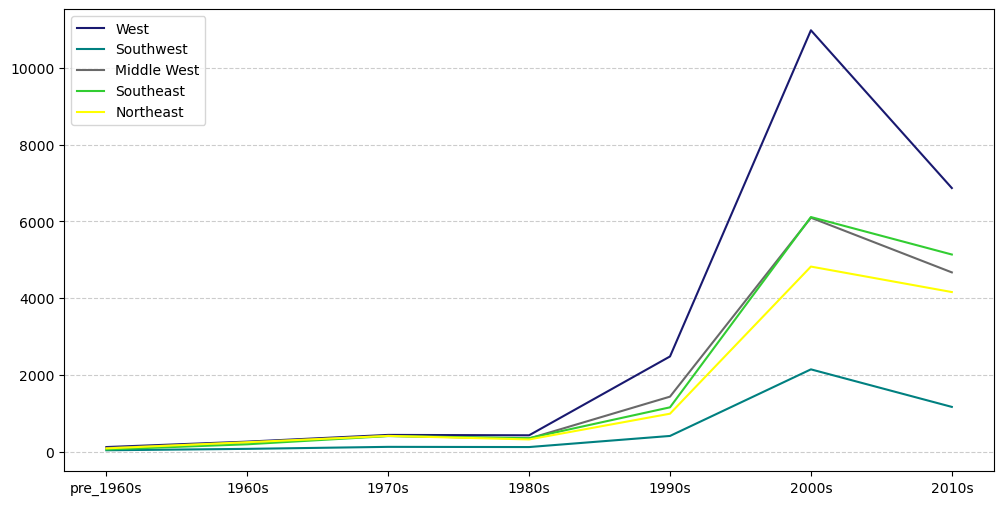

In [15]:
# Plot the number of sightings per decade for each region as a line chart
# define a variable for each region
west_timeline = decade_region_df[decade_region_df["region"] == "West"]
southwest_timeline = decade_region_df[decade_region_df["region"] == "Southwest"]
midwest_timeline = decade_region_df[decade_region_df["region"] == "Middle West"]
southeast_timeline = decade_region_df[decade_region_df["region"] == "Southeast"]
northeast_timeline = decade_region_df[decade_region_df["region"] == "Northeast"]

# configure the chart
plt.figure(figsize=(12,6))

plt.plot(west_timeline.decades, west_timeline.year, color="midnightblue", label="West")
plt.plot(southwest_timeline.decades, southwest_timeline.year, color="teal", label="Southwest")
plt.plot(midwest_timeline.decades, midwest_timeline.year, color="dimgrey", label="Middle West")
plt.plot(southeast_timeline.decades, southeast_timeline.year, color="limegreen", label="Southeast")
plt.plot(northeast_timeline.decades, northeast_timeline.year, color="yellow", label="Northeast")

plt.grid(axis="y", c="gray", linestyle="dashed", alpha=0.4)
plt.legend(loc="best")

# save the donut chart
plt.savefig("sightings_over_time_per_region.png")

# Show the chart
plt.show()

In [17]:
# average length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.mean()

region
Middle West     1437.292950
Northeast       3056.298693
Southeast      12541.125906
Southwest       2261.029073
West            5579.569804
Name: length_of_encounter_seconds, dtype: float64

In [20]:
# variance of length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.var()

region
Middle West    6.951638e+08
Northeast      8.514503e+09
Southeast      5.506051e+11
Southwest      3.350648e+09
West           1.384339e+11
Name: length_of_encounter_seconds, dtype: float64

In [35]:
# standard variation of length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.std()

region
Middle West     26365.958491
Northeast       92274.063384
Southeast      742027.726784
Southwest       57884.784927
West           372067.077164
Name: length_of_encounter_seconds, dtype: float64

<Axes: >

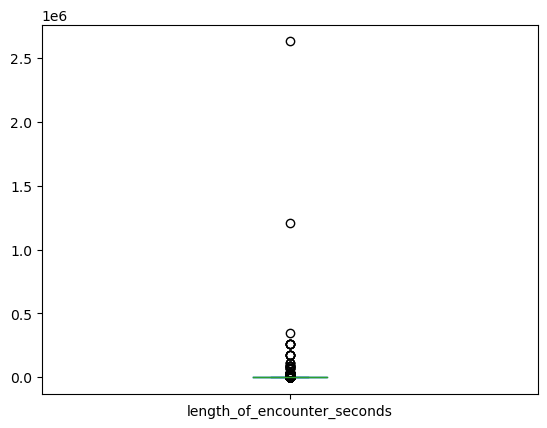

In [41]:
# box plot identfies that the data does have large outliers 
df.loc[df.region == "Middle West", "length_of_encounter_seconds"].plot(kind="box")

In [73]:
# Create a data filter for less than 10 minutes 
sub=df.loc[df.length_of_encounter_seconds <= 600]

In [79]:
# choose two regions to compare by t-test
region_mwest = sub.loc[sub.region == "Middle West", "length_of_encounter_seconds"].values
region_southeast = sub.loc[sub.region == "Southeast", "length_of_encounter_seconds"].values
region_ne = sub.loc[sub.region == "Northeast", "length_of_encounter_seconds"].values
region_sw = sub.loc[sub.region == "Southwest", "length_of_encounter_seconds"].values
region_west = sub.loc[sub.region == "West", "length_of_encounter_seconds"].values

<Axes: xlabel='region', ylabel='length_of_encounter_seconds'>

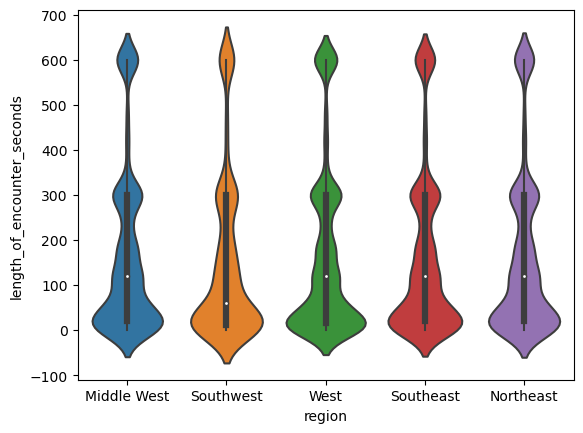

In [80]:
# violin plot to show distribution of data 
sns.violinplot(data=sub, x="region", y="length_of_encounter_seconds")

In [77]:
sub.groupby("region").agg({"length_of_encounter_seconds": ["size", "mean", "var"]})

length_of_encounter_seconds                          
                                   size        mean           var
region                                                           
Middle West                       10292  173.890507  34726.172318
Northeast                          8644  169.188055  33742.242585
Southeast                         10458  168.054413  33629.826962
Southwest                          3165  154.832401  33478.379545
West                              16545  170.382329  35557.287461

In [78]:
# no diff in avg length of encounter btwn sw & any region / sw region will have sig shorter avg lenth than other regions
stats.ttest_ind(region_mwest, region_sw, equal_var=True)

Ttest_indResult(statistic=5.053083914347702, pvalue=4.4043547406793806e-07)

In [81]:
# no diff in avg length of encounter btwn sw & any region / sw region will have sig shorter avg lenth than other regions
stats.ttest_ind(region_west, region_ne, equal_var=True)

Ttest_indResult(statistic=0.48146214824686057, pvalue=0.6301922584538886)

In [82]:

stats.ttest_ind(region_mwest, region_southeast, equal_var=True)

Ttest_indResult(statistic=2.2737462922464458, pvalue=0.02299141506658368)

In [83]:
stats.ttest_ind(region_ne, region_southeast, equal_var=True)
# middle west region statistically sig higher than others; in contrast, sw is smaller than others

Ttest_indResult(statistic=0.4249402115139677, pvalue=0.6708850470168588)

In [72]:
df.length_of_encounter_seconds.describe()

count    6.355300e+04
mean     5.527375e+03
std      4.065878e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      6.627600e+07
Name: length_of_encounter_seconds, dtype: float64

In [32]:
# Run the t-test on the two population samples
# tells us that the data in the 'length_of_encounter_seconds' has extreme outliers/large variation
stats.ttest_ind(region_mwest, region_southeast, equal_var=False)

Ttest_indResult(statistic=-1.7336436439691478, pvalue=0.08300420961370683)

In [70]:
# most frequent shape seen by region

df["istriangle"] = df["UFO_shape"] == "triangle"
shape_df = df.groupby(["region"])["istriangle"].sum().reset_index()
shape_df

,region,istriangle
0,Middle West,1574
1,Northeast,1100
2,Southeast,1424
3,Southwest,431
4,West,2025


In [71]:
# 
stats.ttest_ind(df[df["region"] == "West"]["istriangle"], df[df["region"] == "Southwest"]["istriangle"], equal_var=False)

Ttest_indResult(statistic=-2.1314458489337658, pvalue=0.03309569541204026)

In [ ]:
# regression: lat, lon, predict length of encounter
# scatter plot 1, lat on x, length of encounter on y
# scatter plot 1, long on x, length of encounter on y